In [52]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [53]:
import pandas as pd
import numpy as np
import os
import seaborn as sns  # Corrected the typo from "seasborn"
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings

warnings.filterwarnings('ignore')

In [54]:
paths=[]
labels=[]
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append((os.path.join(dirname, filename)))
        label= filename.split('_')[-1]
        label= label.split('.')[0]
        labels.append(label.lower())
print('Dataset is loaded')

Dataset is loaded


In [55]:
paths[:5]

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav']

In [56]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [57]:
df=pd.DataFrame()
df['speech']= paths
df['label']= labels
df.head()

,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [58]:
df['label'].value_counts()

label
fear       800
angry      800
disgust    800
neutral    800
sad        800
ps         800
happy      800
Name: count, dtype: int64

In [59]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))  # sr means sample rate
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)  # use waveshow instead of waveplot (it's the updated version)
    plt.tight_layout()
    plt.show()

def spectrogram(data, sr, emotion):  # fixed typo in function name
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.tight_layout()
    plt.show()  





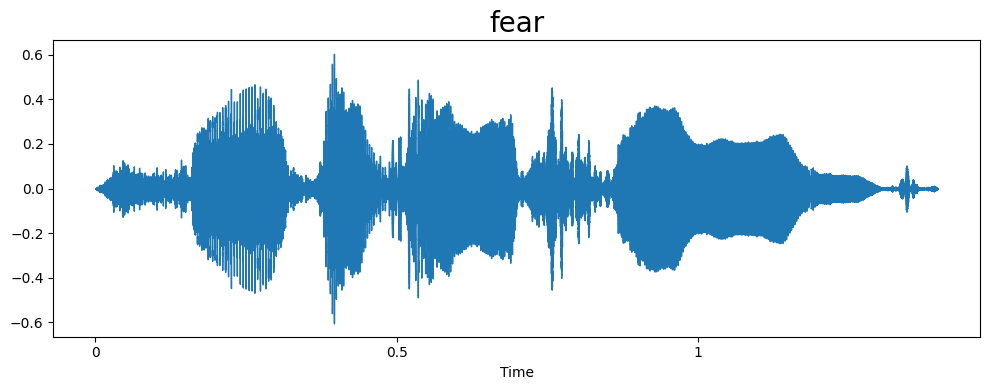

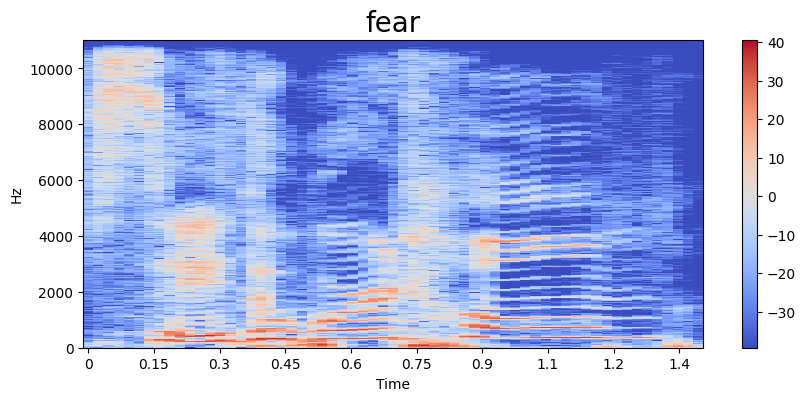

In [60]:
emotion = 'fear'
path = df[df['label'] == emotion]['speech'].iloc[0] 
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)



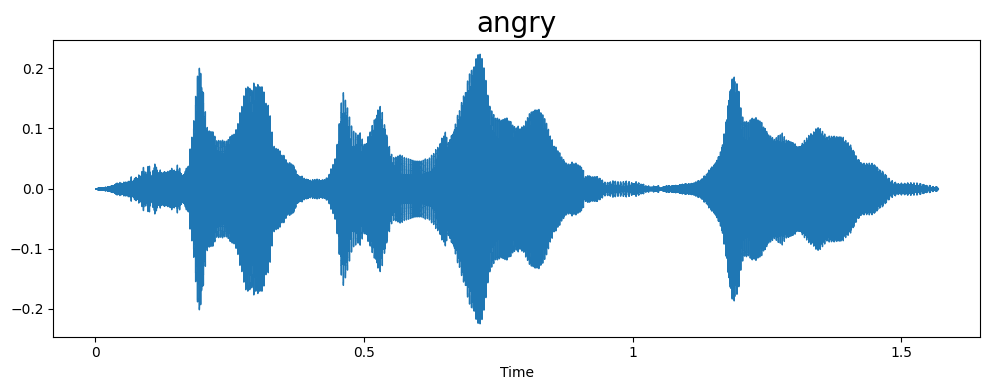

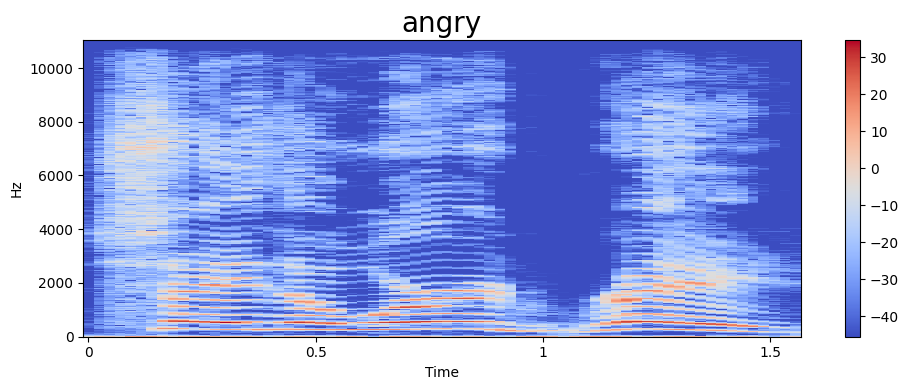

In [61]:
emotion = 'angry'
path = df[df['label'] == emotion]['speech'].iloc[0] 
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)  
Audio(path)


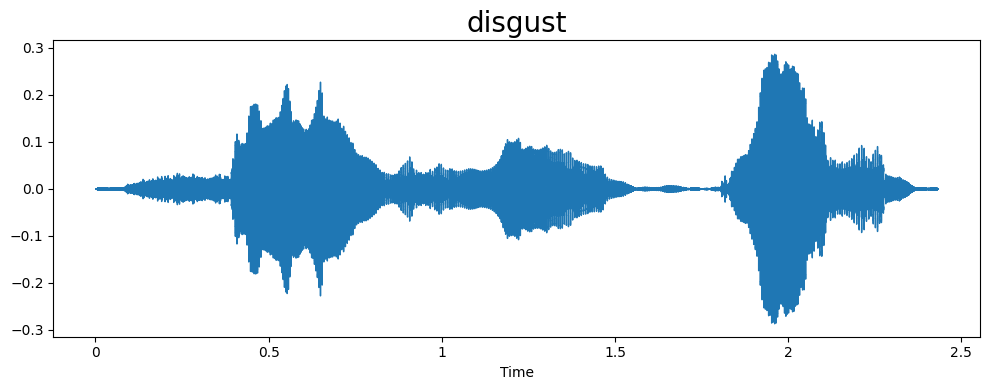

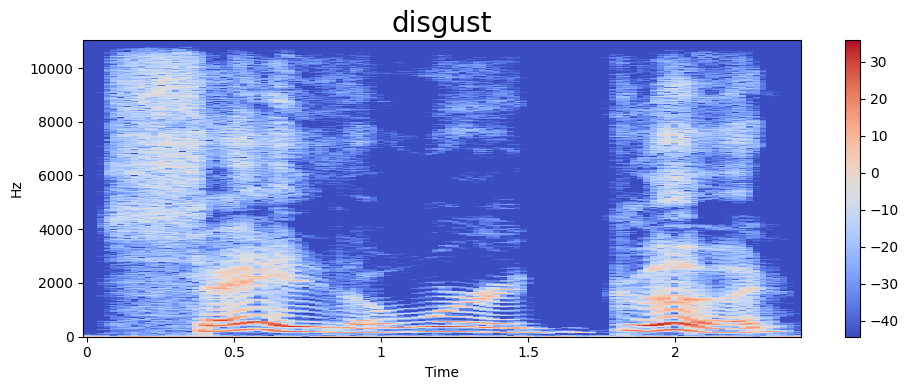

In [62]:
emotion = 'disgust'
path = df[df['label'] == emotion]['speech'].iloc[0] 
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)  
Audio(path)

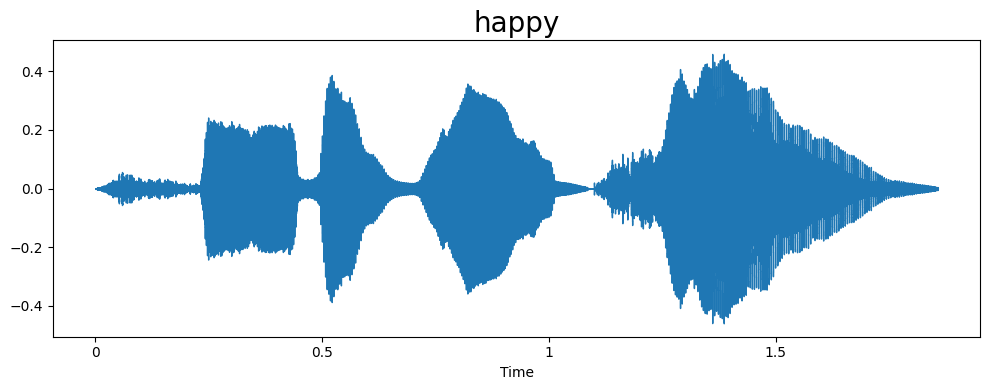

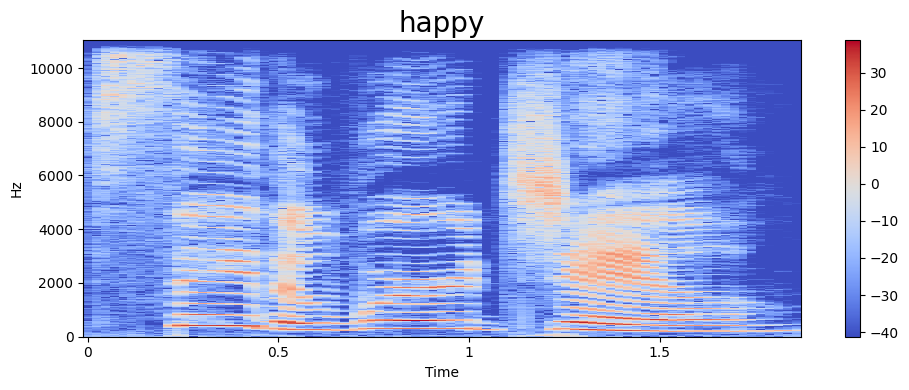

In [63]:
emotion = 'happy'
path = df[df['label'] == emotion]['speech'].iloc[0] 
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)  
Audio(path)

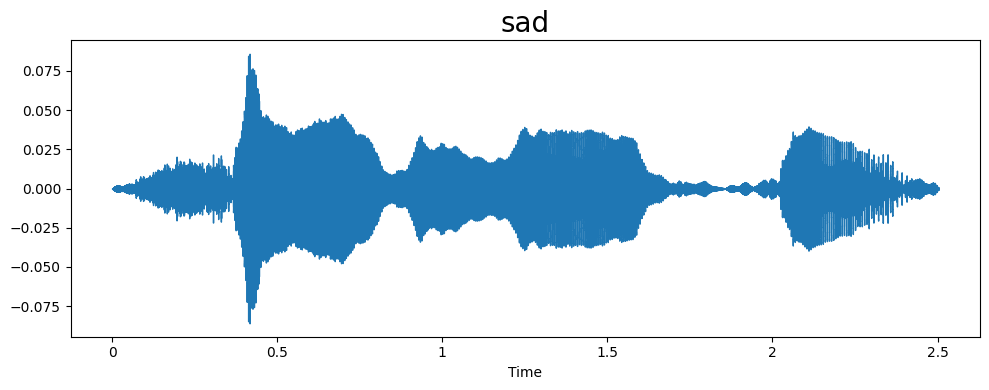

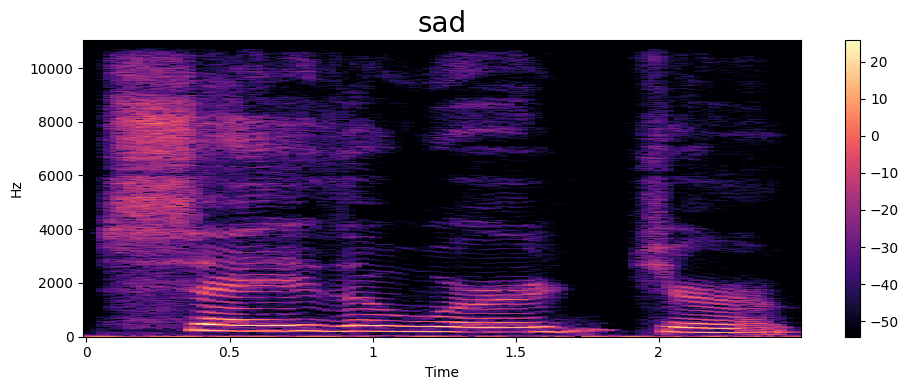

In [64]:
emotion = 'sad'
path = df[df['label'] == emotion]['speech'].iloc[0] 
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)  
Audio(path)

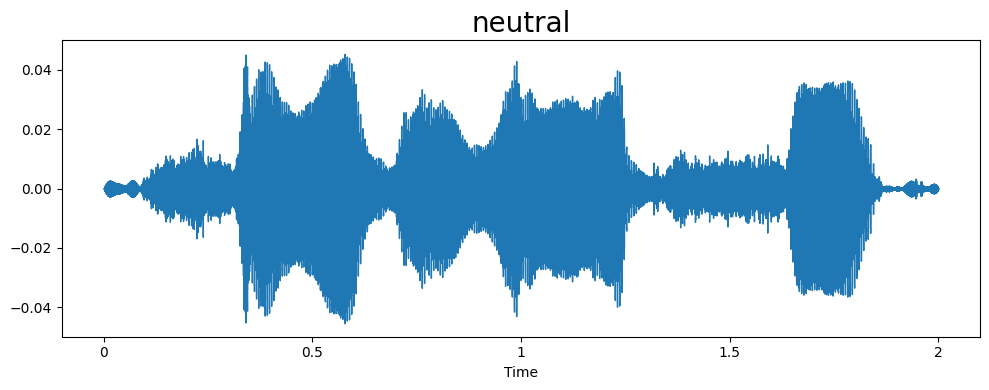

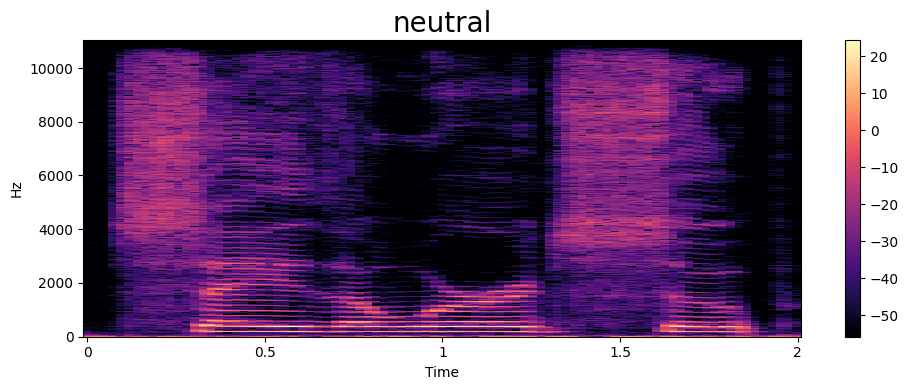

In [65]:
emotion = 'neutral'
path = df[df['label'] == emotion]['speech'].iloc[0] 
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)  
Audio(path)

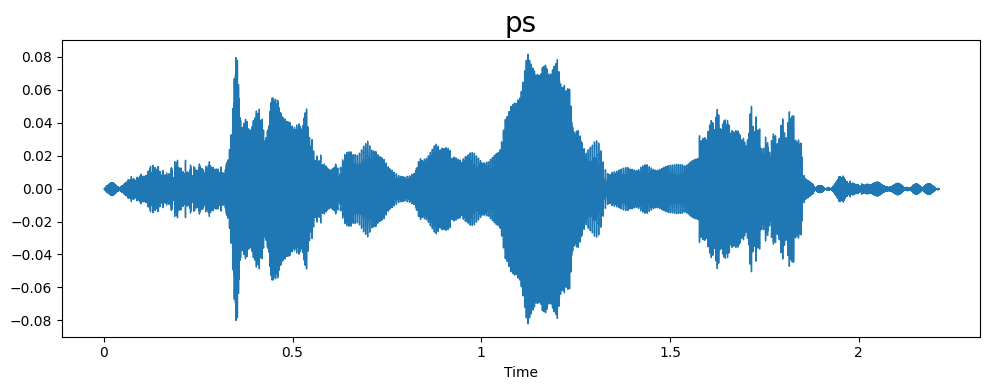

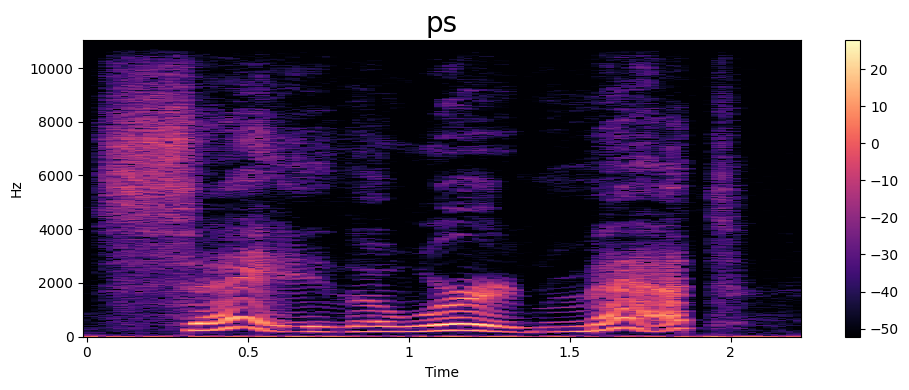

In [66]:
emotion = 'ps'
path = df[df['label'] == emotion]['speech'].iloc[0] 
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)  
Audio(path)

In [67]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc =np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)
    return mfcc


In [68]:
extract_mfcc(df ['speech'][0])

array([-285.73727  ,   85.78295  ,   -2.1689112,   22.125532 ,
        -14.757396 ,   11.051346 ,   12.41245  ,   -3.000262 ,
          1.0844992,   11.078272 ,  -17.419659 ,   -8.093213 ,
          6.5879726,   -4.2209525,   -9.15508  ,    3.5214796,
        -13.186381 ,   14.078853 ,   19.66973  ,   22.725618 ,
         32.574635 ,   16.325033 ,   -3.8427296,    0.8962965,
        -11.239263 ,    6.653462 ,   -2.5883694,   -7.714016 ,
        -10.941657 ,   -2.4007545,   -5.2812867,    4.2711573,
        -11.202217 ,   -9.024621 ,   -3.6669843,    4.869744 ,
         -1.6027982,    2.5600514,   11.454374 ,   11.233449 ],
      dtype=float32)

In [69]:
x_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [70]:
x_mfcc

0       [-285.73727, 85.78295, -2.1689112, 22.125532, ...
1       [-348.34332, 35.193233, -3.8413274, 14.658876,...
2       [-340.11435, 53.79644, -14.267782, 20.884027, ...
3       [-306.63422, 21.259705, -4.4110823, 6.4871554,...
4       [-344.7548, 46.329193, -24.171413, 19.392921, ...
                              ...                        
5595    [-374.3952, 60.864998, 0.025058484, 8.431059, ...
5596    [-313.96478, 39.847843, -5.6493053, -3.8675754...
5597    [-357.54883, 77.88606, -15.224756, 2.1946328, ...
5598    [-353.1474, 101.6839, -14.175897, -12.037376, ...
5599    [-389.4595, 54.042767, 1.3469975, -1.4258981, ...
Name: speech, Length: 5600, dtype: object

In [73]:
#we want to convert the above x_mfcc to 2 dimentional array
x=[x for x in x_mfcc]
x=np.array(x)
x.shape

(5600, 40)

In [87]:
#input split
x = np.squeeze(x)  
x = np.expand_dims(x,-1)
x.shape

(5600, 40, 1)

In [82]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [94]:
y = y.toarray()

In [95]:
y.shape

(5600, 7)

Create the LSTM Model


In [96]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

model=Sequential([
    LSTM(123,return_sequences=False,input_shape=(40,1)),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 123)                 │          61,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           7,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,747 (280.26 KB)

 Trainable params: 71,747 (280.26 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
#train model

history = model.fit(x,y,validation_split=0.2,epochs=100,batch_size=512,shuffle=True)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 245ms/step - accuracy: 0.2330 - loss: 1.9082 - val_accuracy: 0.0982 - val_loss: 1.9423
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 184ms/step - accuracy: 0.5515 - loss: 1.5299 - val_accuracy: 0.1036 - val_loss: 2.0060
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - accuracy: 0.6420 - loss: 1.0747 - val_accuracy: 0.1393 - val_loss: 1.5989
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - accuracy: 0.7069 - loss: 0.8036 - val_accuracy: 0.3866 - val_loss: 1.2505
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 188ms/step - accuracy: 0.7742 - loss: 0.6163 - val_accuracy: 0.5473 - val_loss: 0.9484
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - accuracy: 0.8186 - loss: 0.4872 - val_accuracy: 0.6795 - val_loss: 0.6886
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 184ms/step - accuracy: 0.8609 - loss: 0.3813 - val_accuracy: 0.7375 - val_loss: 0.6485
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step - accuracy: 0.8609 - loss: 0.3712 - val_accuracy: 0.7777 - v

<function matplotlib.pyplot.show(close=None, block=None)>

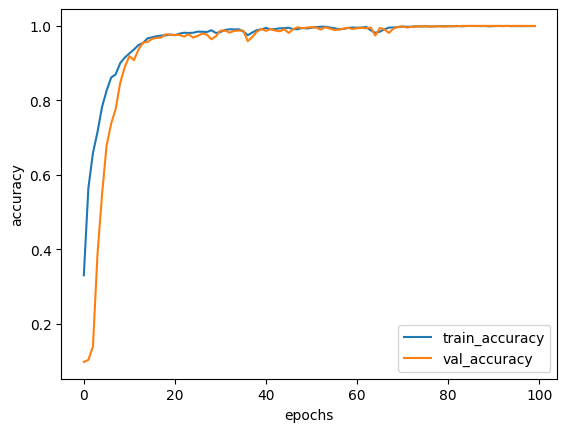

In [98]:
epochs=list(range(100))
acc= history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs,acc, label='train_accuracy')
plt.plot(epochs,val_acc, label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

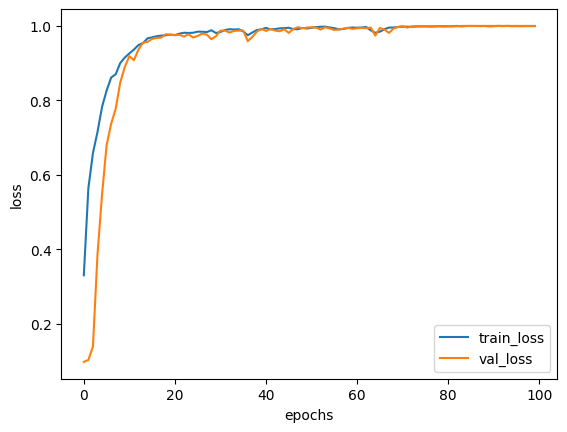

In [99]:
loss= history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs,acc, label='train_loss')
plt.plot(epochs,val_acc, label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show

In [100]:
model.save('speech_model.h5')


In [101]:
from IPython.display import FileLink

# For .h5 model
FileLink(r'speech_model.h5')

/kaggle/working/speech_model.h5

In [103]:
import joblib
joblib.dump(enc, 'label_encoder.pkl')


['label_encoder.pkl']

In [104]:
from IPython.display import FileLink

FileLink('label_encoder.pkl')


/kaggle/working/label_encoder.pkl